In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensuring non-interactive backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Data Loading

In [3]:
# Load the dataset
data_path = 'house_prices_dataset.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows of the dataframe
print('Dataset loaded successfully. Here are the first few rows:')
df.head()

Dataset loaded successfully. Here are the first few rows:


,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


## Data Cleaning and Preprocessing

In [4]:
# Check for missing values
print('Checking for missing values:')
print(df.isnull().sum())

Checking for missing values:
square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64


In [5]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [7]:
# Ensure numeric columns 
numeric_columns = ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)', 'price']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
# Log any rows with missing values after conversion
missing_after_conversion = df[numeric_columns].isnull().sum()
print('Missing values after conversion:')
print(missing_after_conversion)

Missing values after conversion:
square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64


In [9]:
# Optionally, drop rows with missing values for a clean analysis
df = df.dropna()
print('New shape of the dataframe after dropping missing values:', df.shape)

New shape of the dataframe after dropping missing values: (10000, 5)


## Exploratory Data Analysis (EDA)

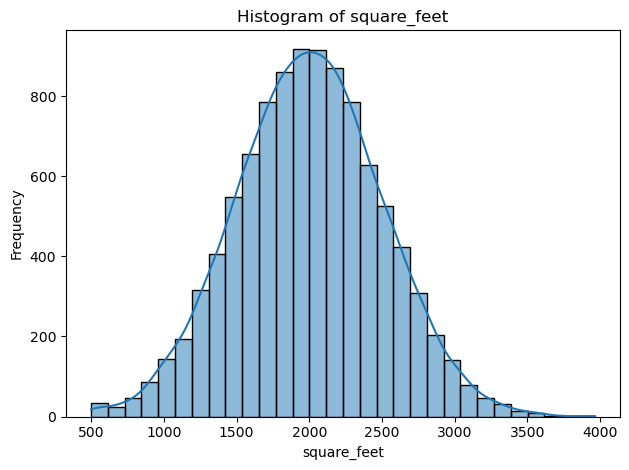

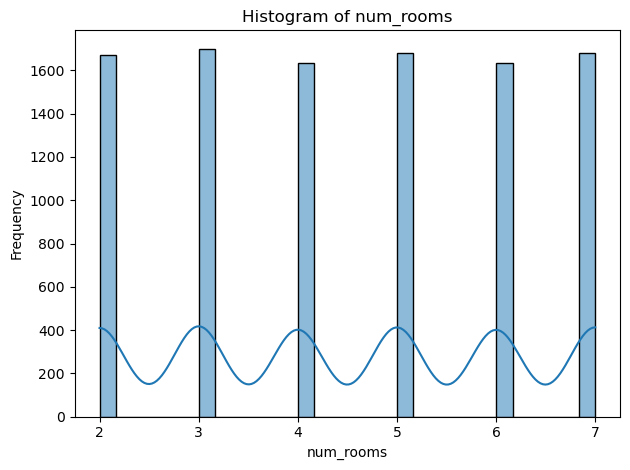

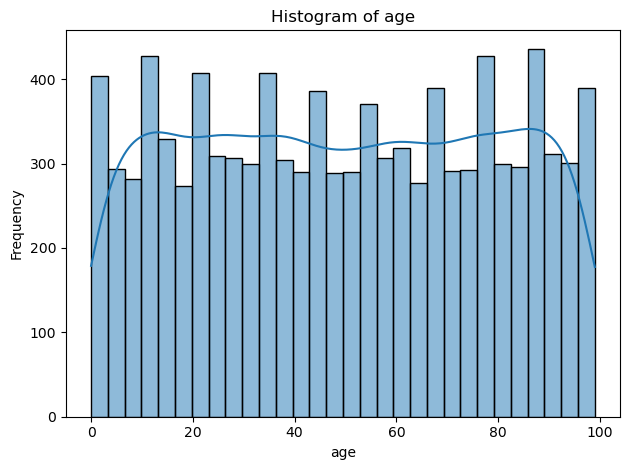

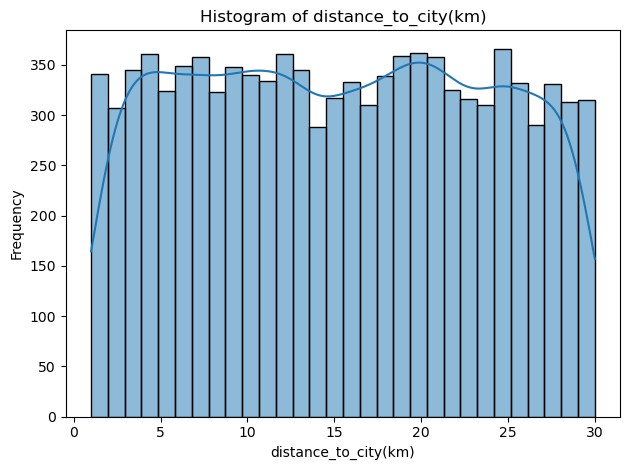

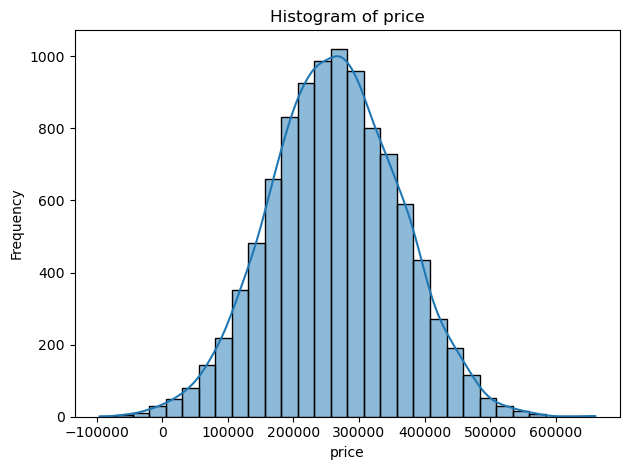

In [10]:
## Histograms for each numeric column
for col in numeric_columns:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

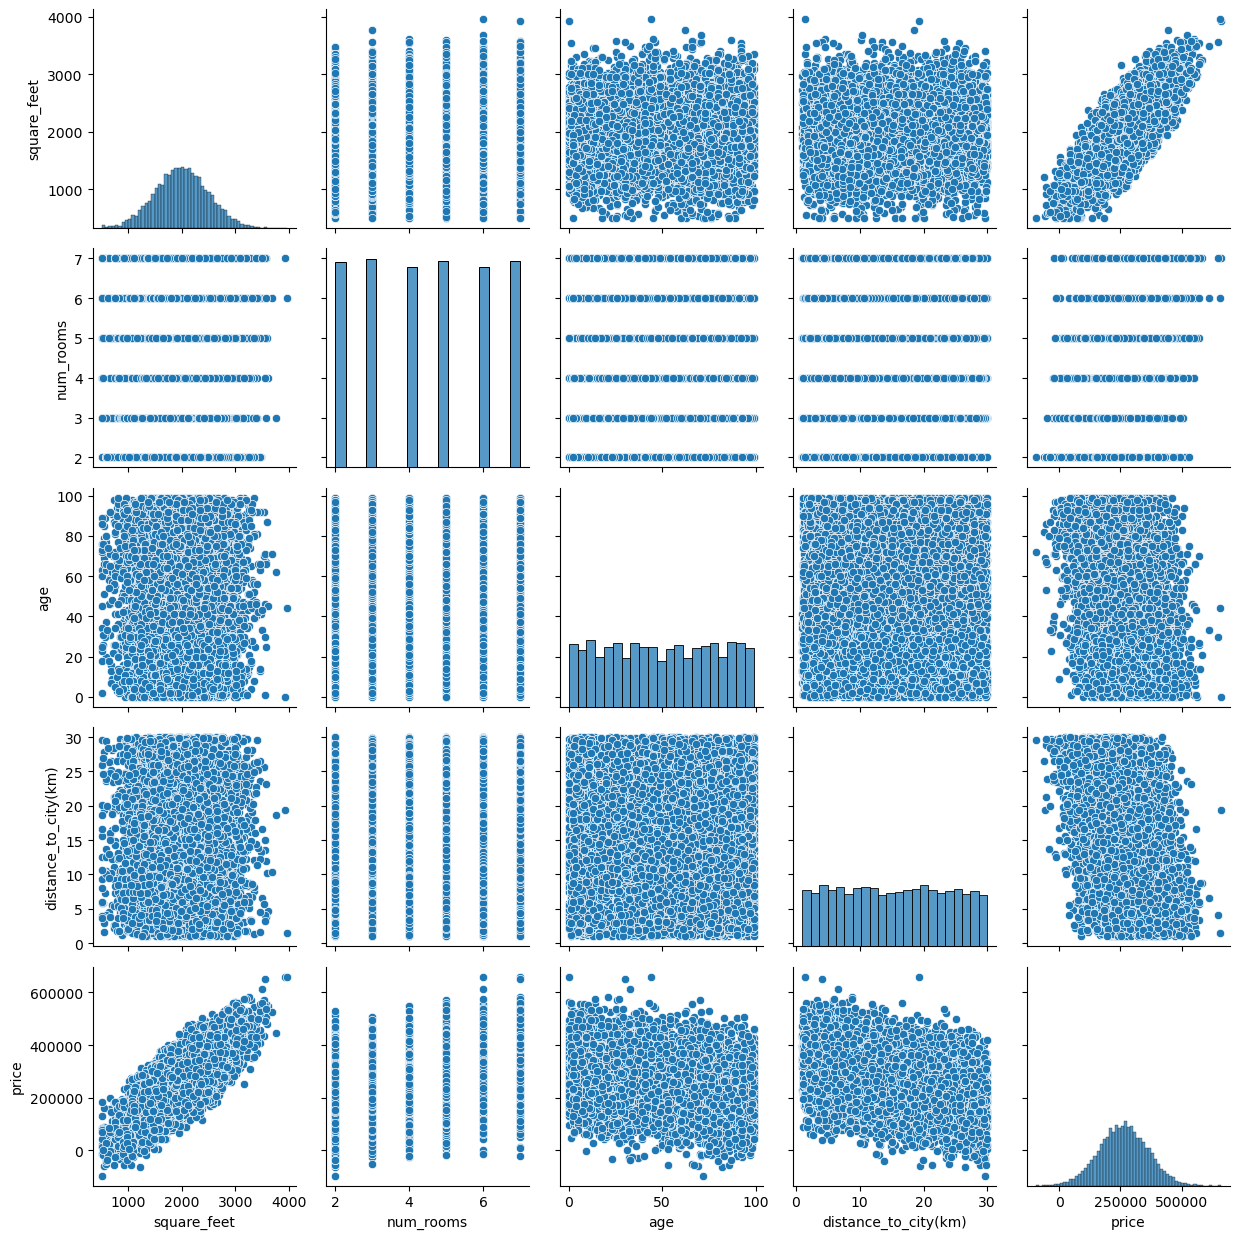

In [12]:
## Pair Plot to inspect pairwise relationships
sns.pairplot(df[numeric_columns])
plt.tight_layout()
plt.show()

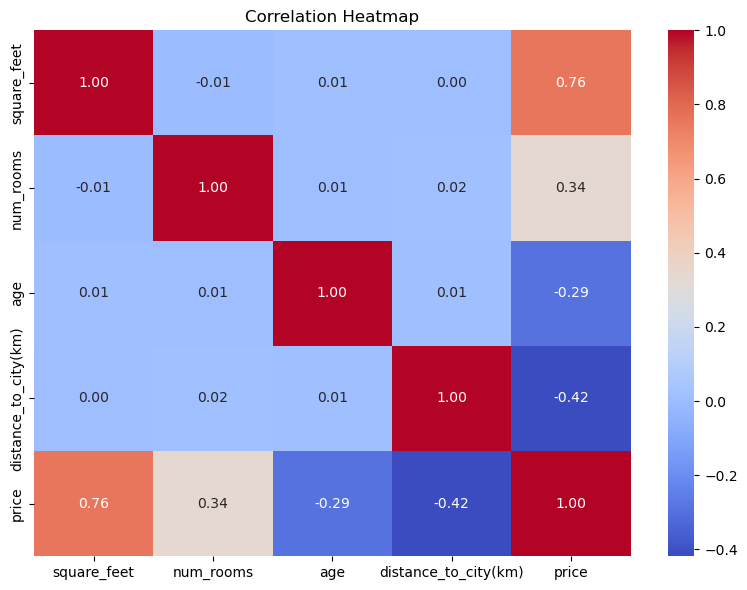

In [13]:
## Correlation Heatmap (only include numeric values)
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8, 6))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap.')

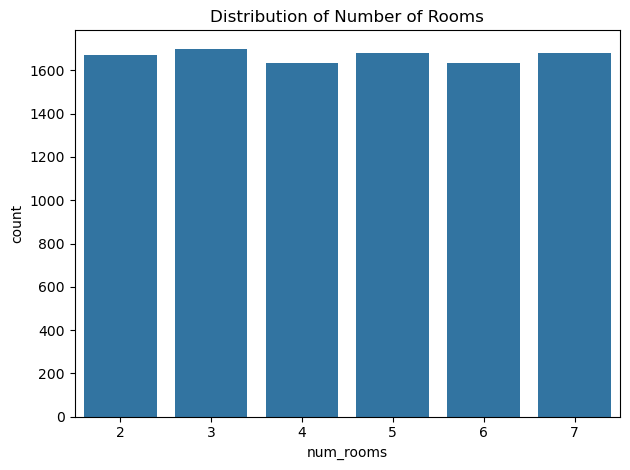

In [15]:
## Count Plot
if 'num_rooms' in df.columns:
    plt.figure()
    sns.countplot(x='num_rooms', data=df)
    plt.title('Distribution of Number of Rooms')
    plt.tight_layout()
    plt.show()

## Predictive Modeling

In [17]:
# Define features and target variable
features = ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)']
target = 'price'

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [19]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Define features and target variable
features = ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)']
target = 'price'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2) score: {r2}')

Root Mean Squared Error (RMSE): 386443817.4602803
R-squared (R2) score: 0.960063695761787


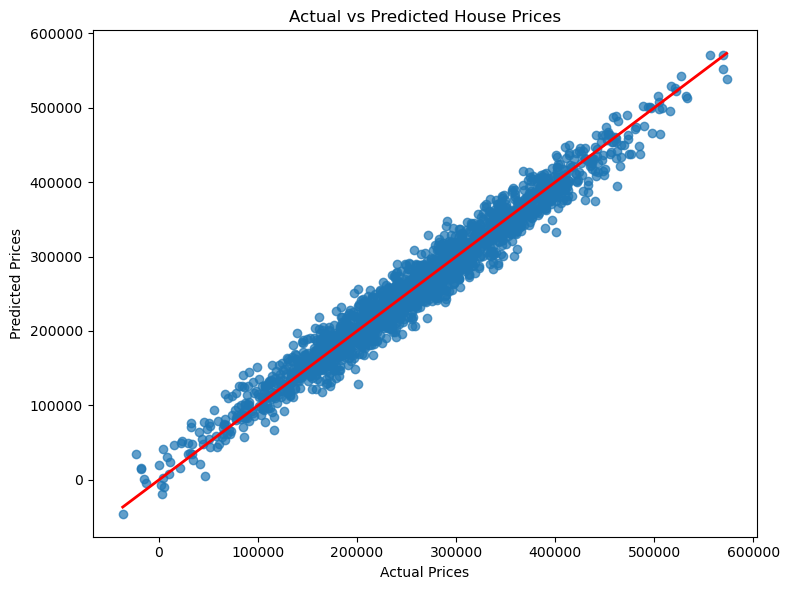

In [27]:
# Plotting Predicted vs Actual Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Identity line
plt.tight_layout()
plt.show()

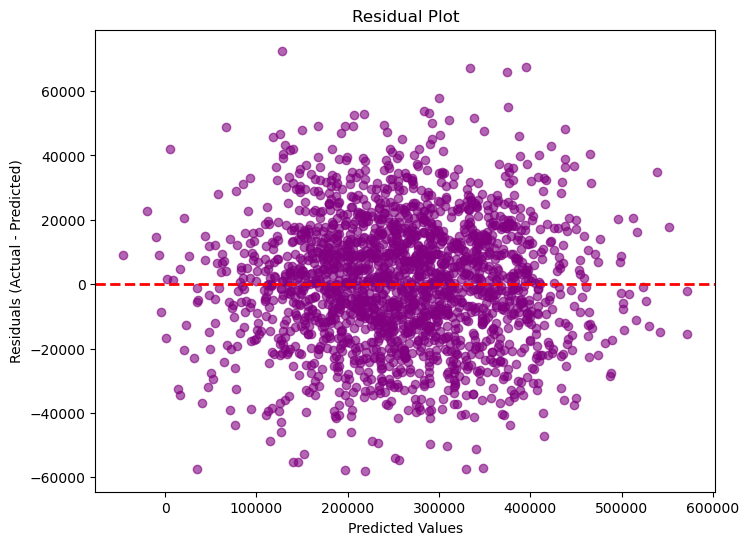

In [28]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()